<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/%EC%B0%A8%EC%84%A0%EA%B2%80%EC%B6%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

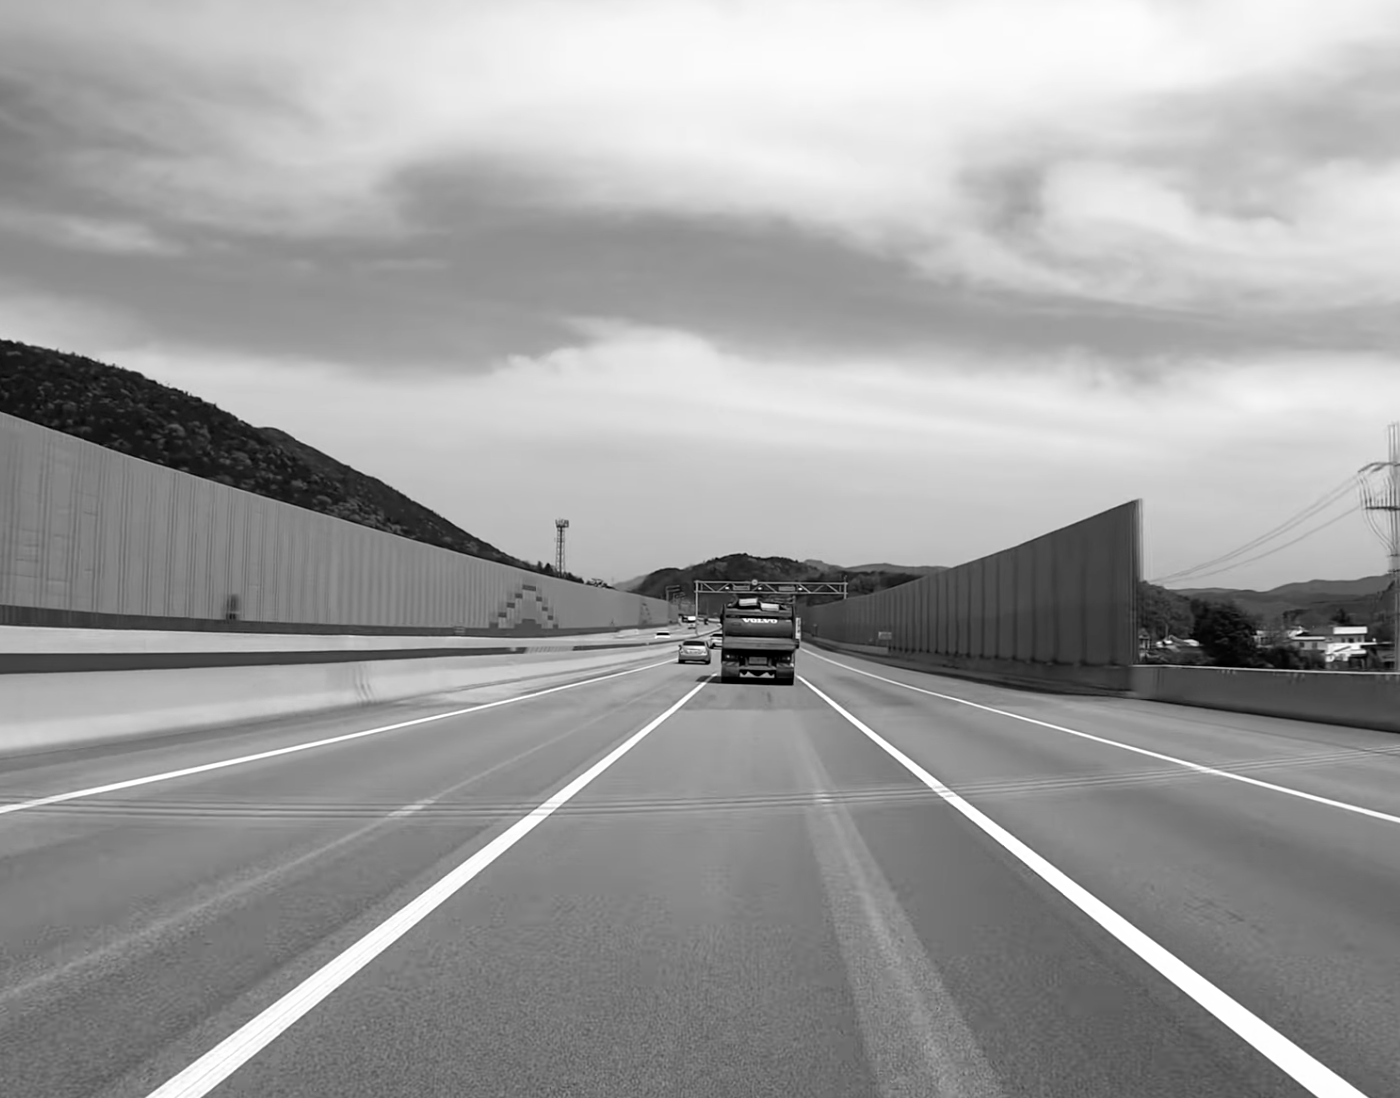

In [3]:
road_img = cv2.imread('road1.jpg')
road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2RGB)
road_img = cv2.cvtColor(road_img, cv2.COLOR_RGB2GRAY)

cv2_imshow(road_img)

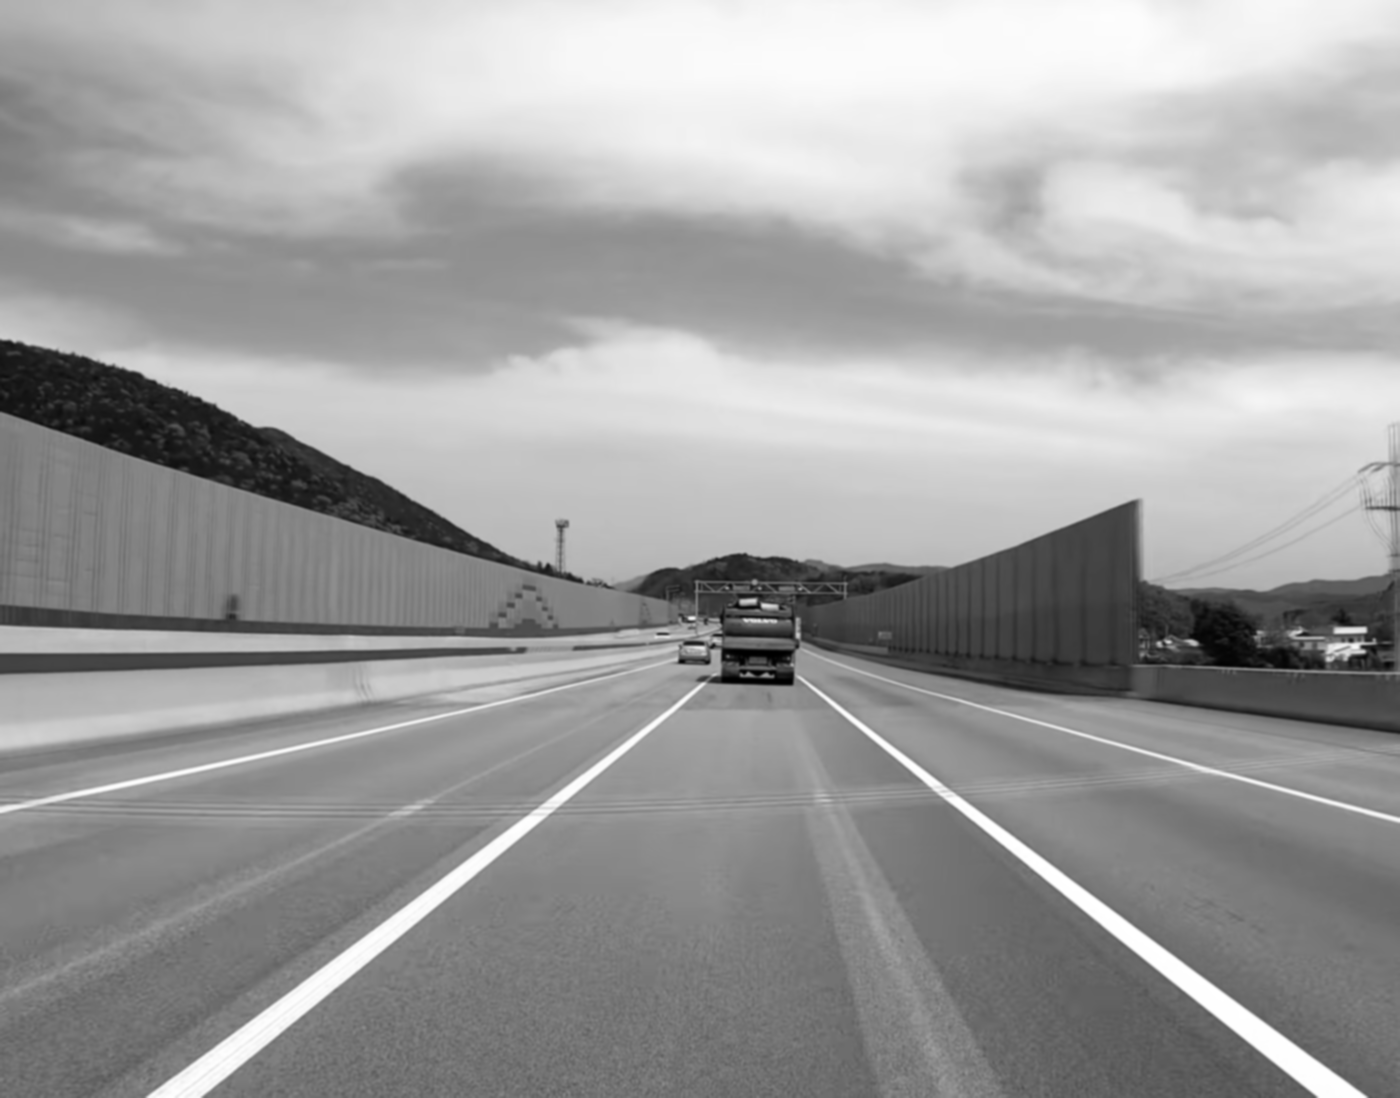

In [4]:
road_blur = cv2.GaussianBlur(road_img, (5,5), 0)
cv2_imshow(road_blur)

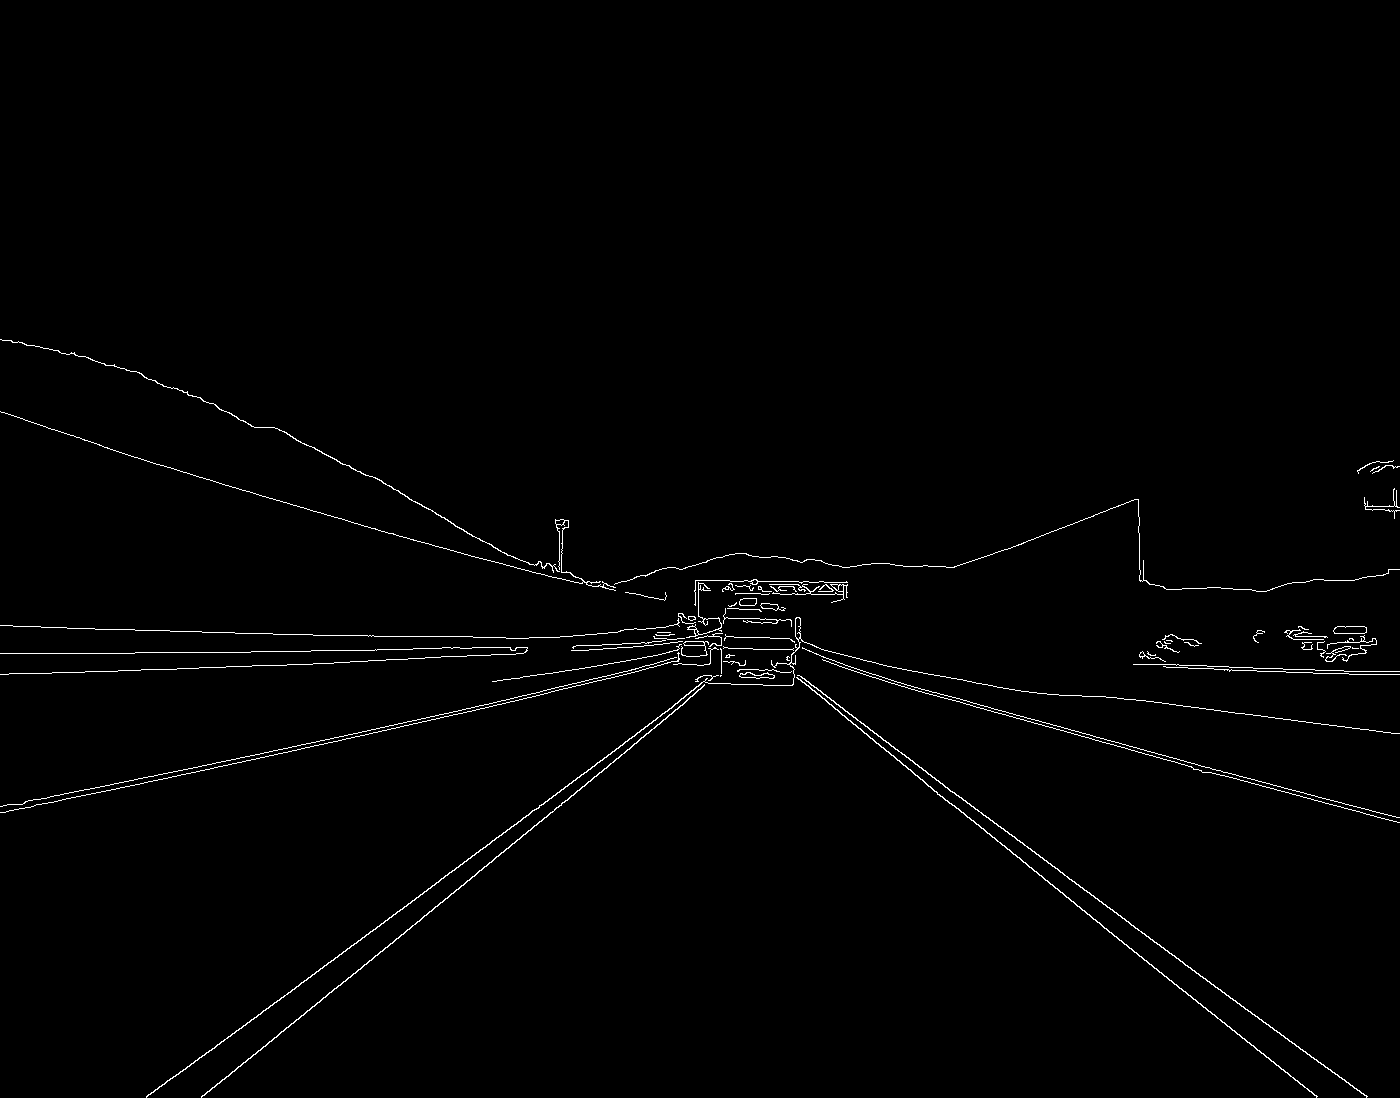

In [5]:
road_edge = cv2.Canny(road_blur, 100, 250)
cv2_imshow(road_edge)

In [6]:
road_blur.shape

(1098, 1400)

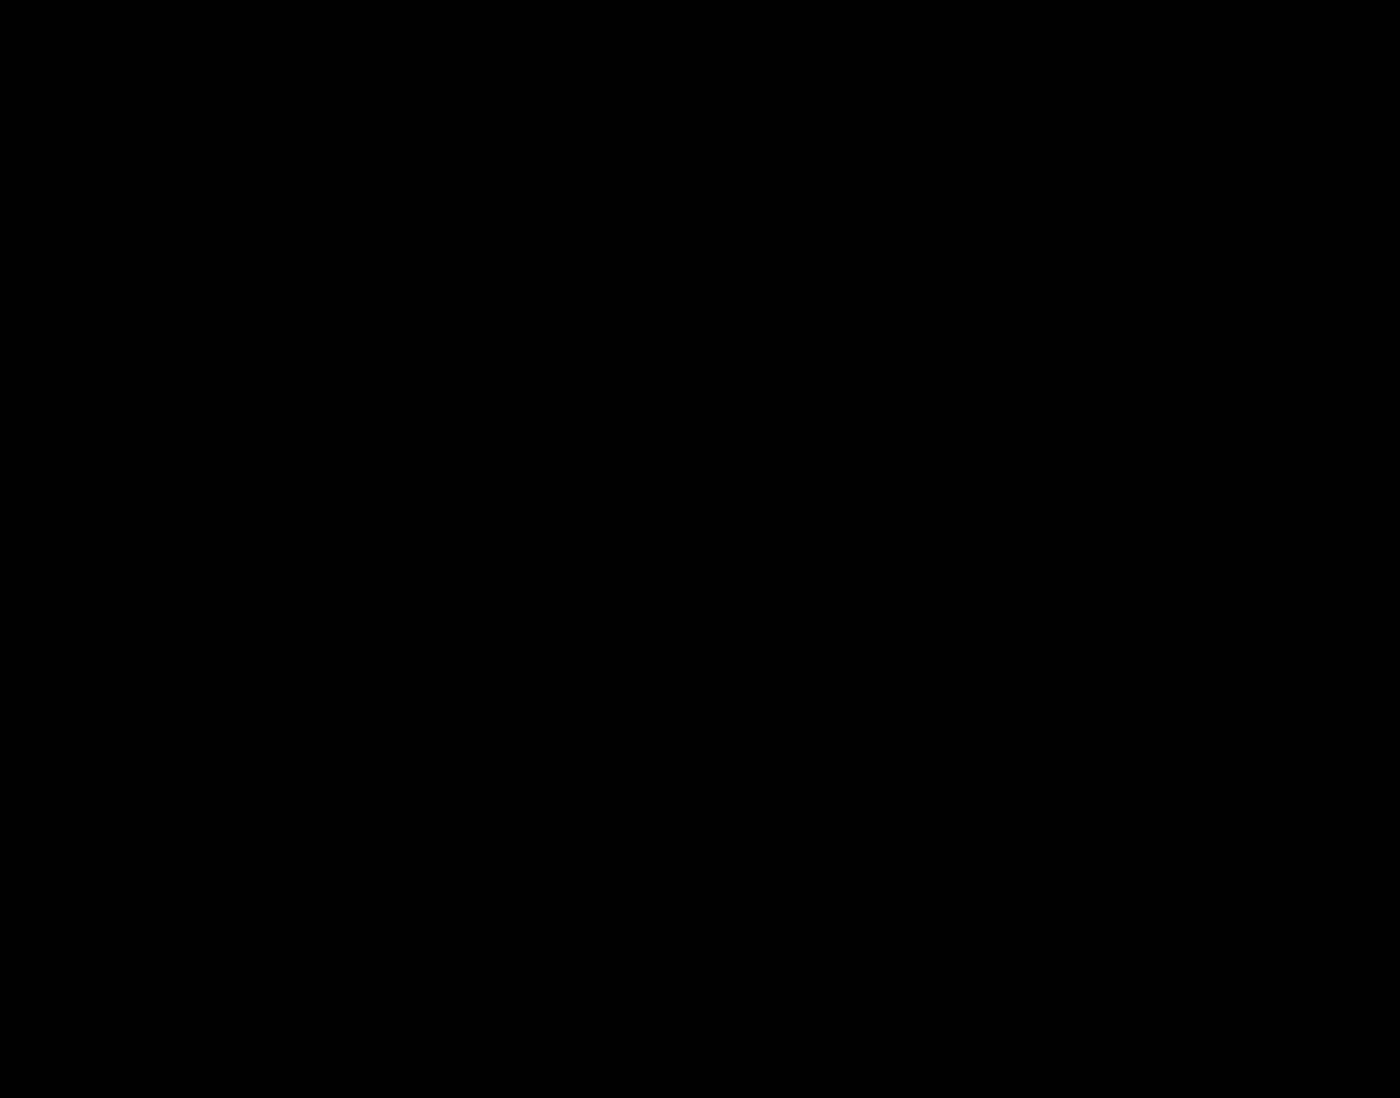

In [8]:
# 마스크 이미지 생성 (1098, 1400) 크기의 이미지 생성
import numpy as np
mask = np.zeros([1098,1400], dtype = 'uint8')
cv2_imshow(mask)

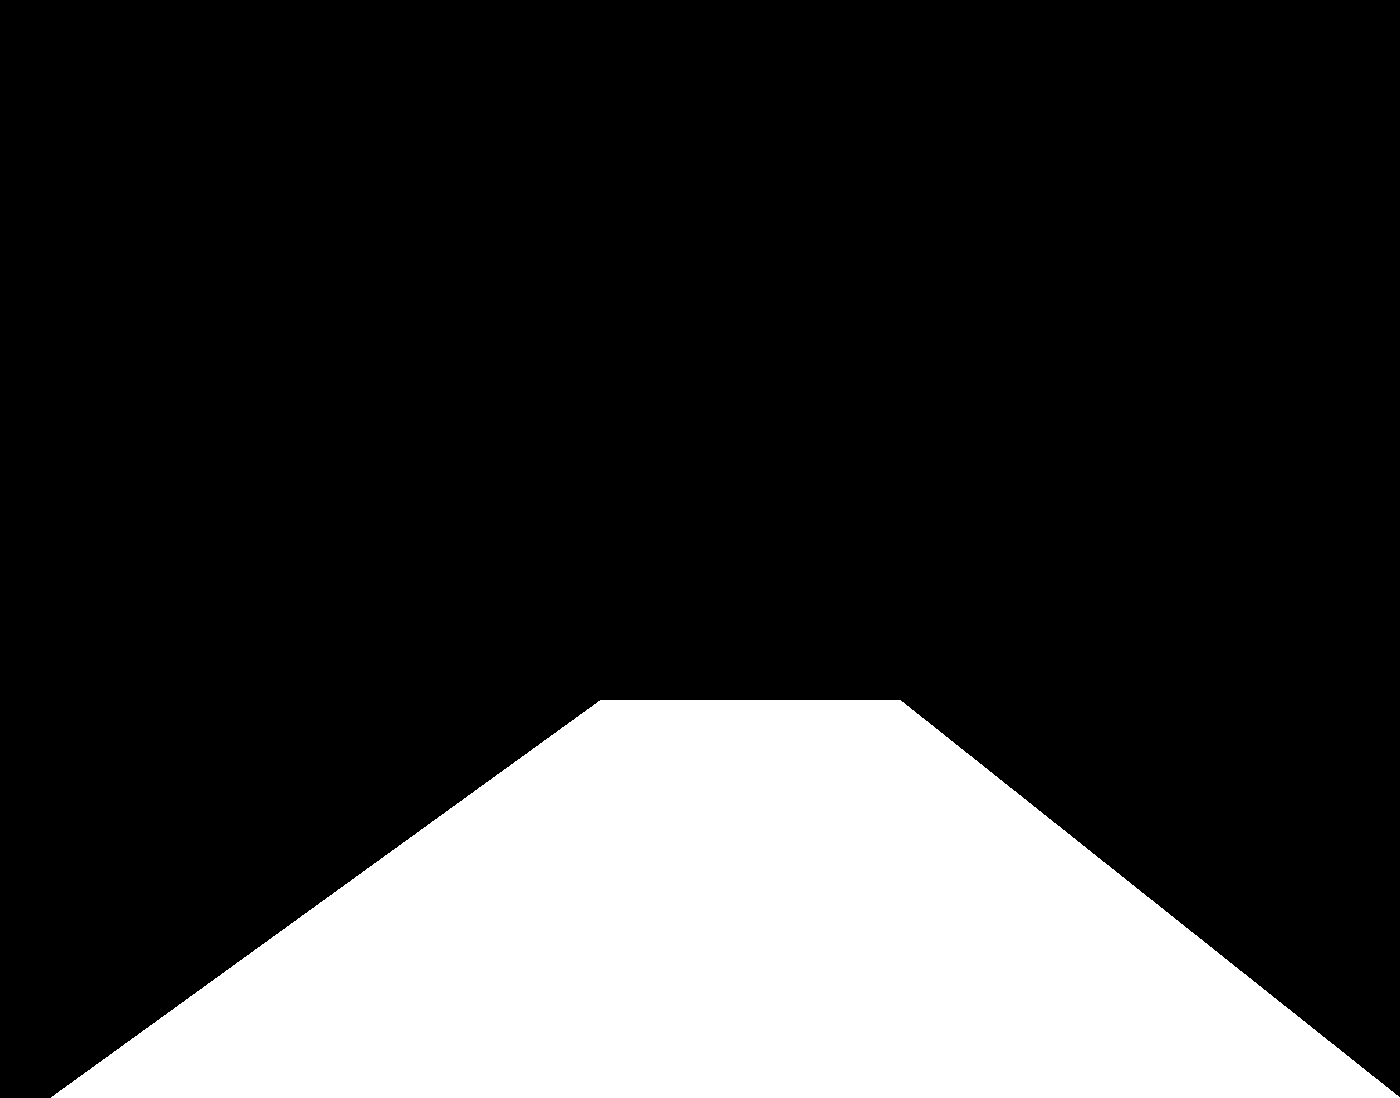

In [10]:
# 차선 검출을 위한 마스크 이미지 생성
point = np.array([[(50,1098), (600,700), (900,700), (1400,1098)]])
cv2.fillPoly(mask, point, 255)
cv2_imshow(mask)

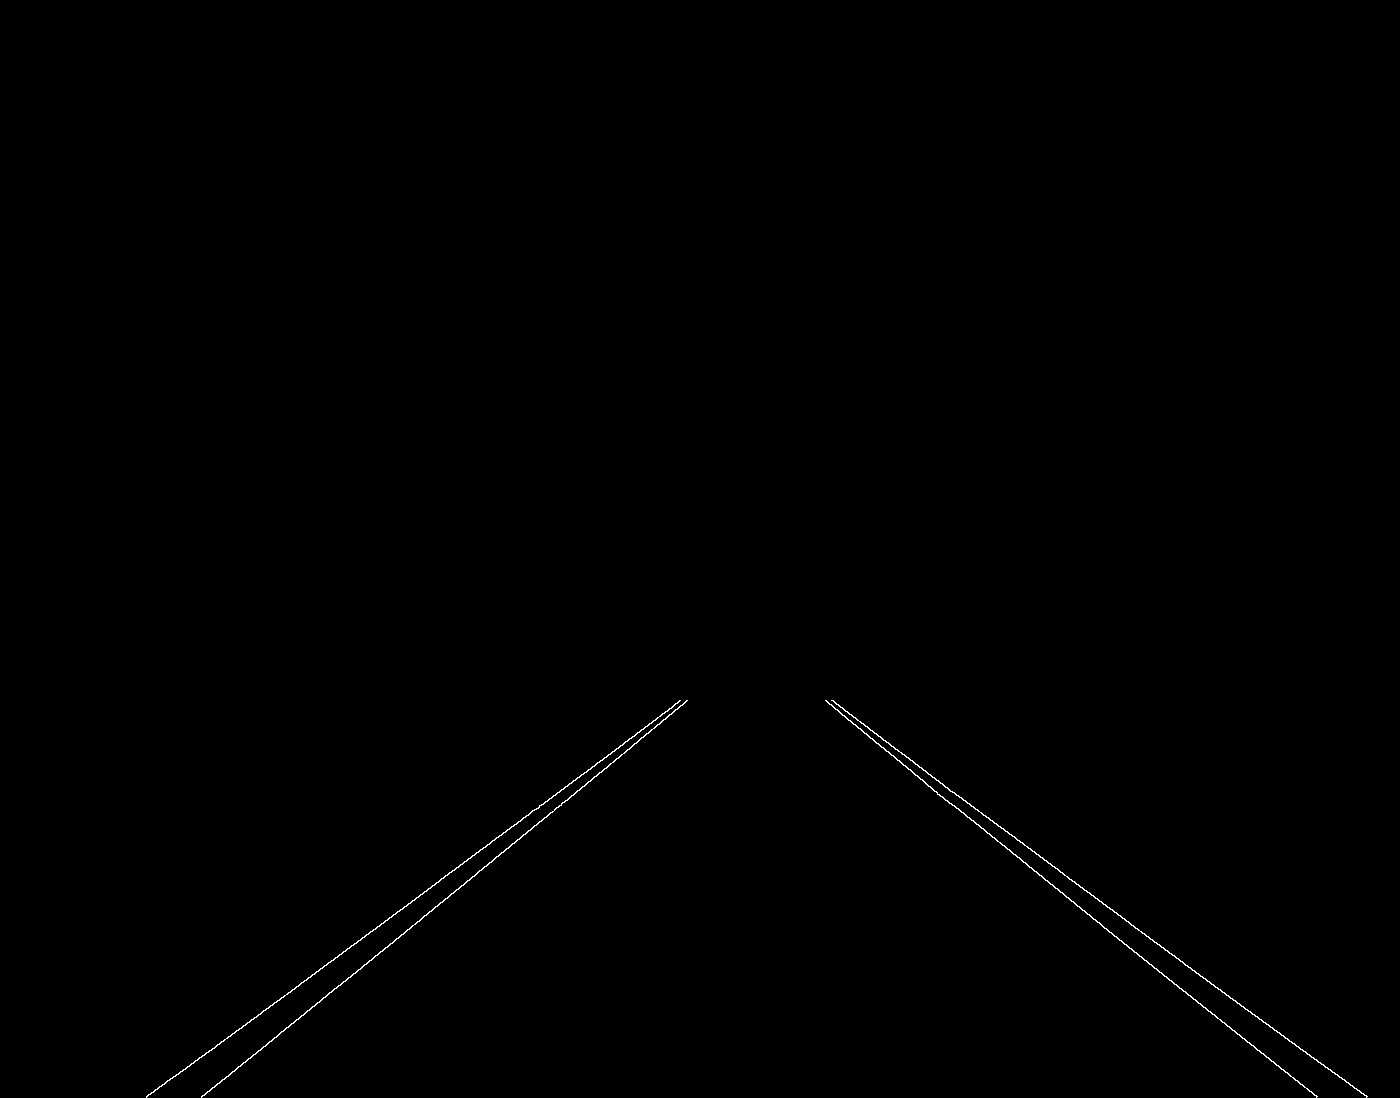

In [11]:
result_img = cv2.bitwise_and(road_edge, mask)
cv2_imshow(result_img)

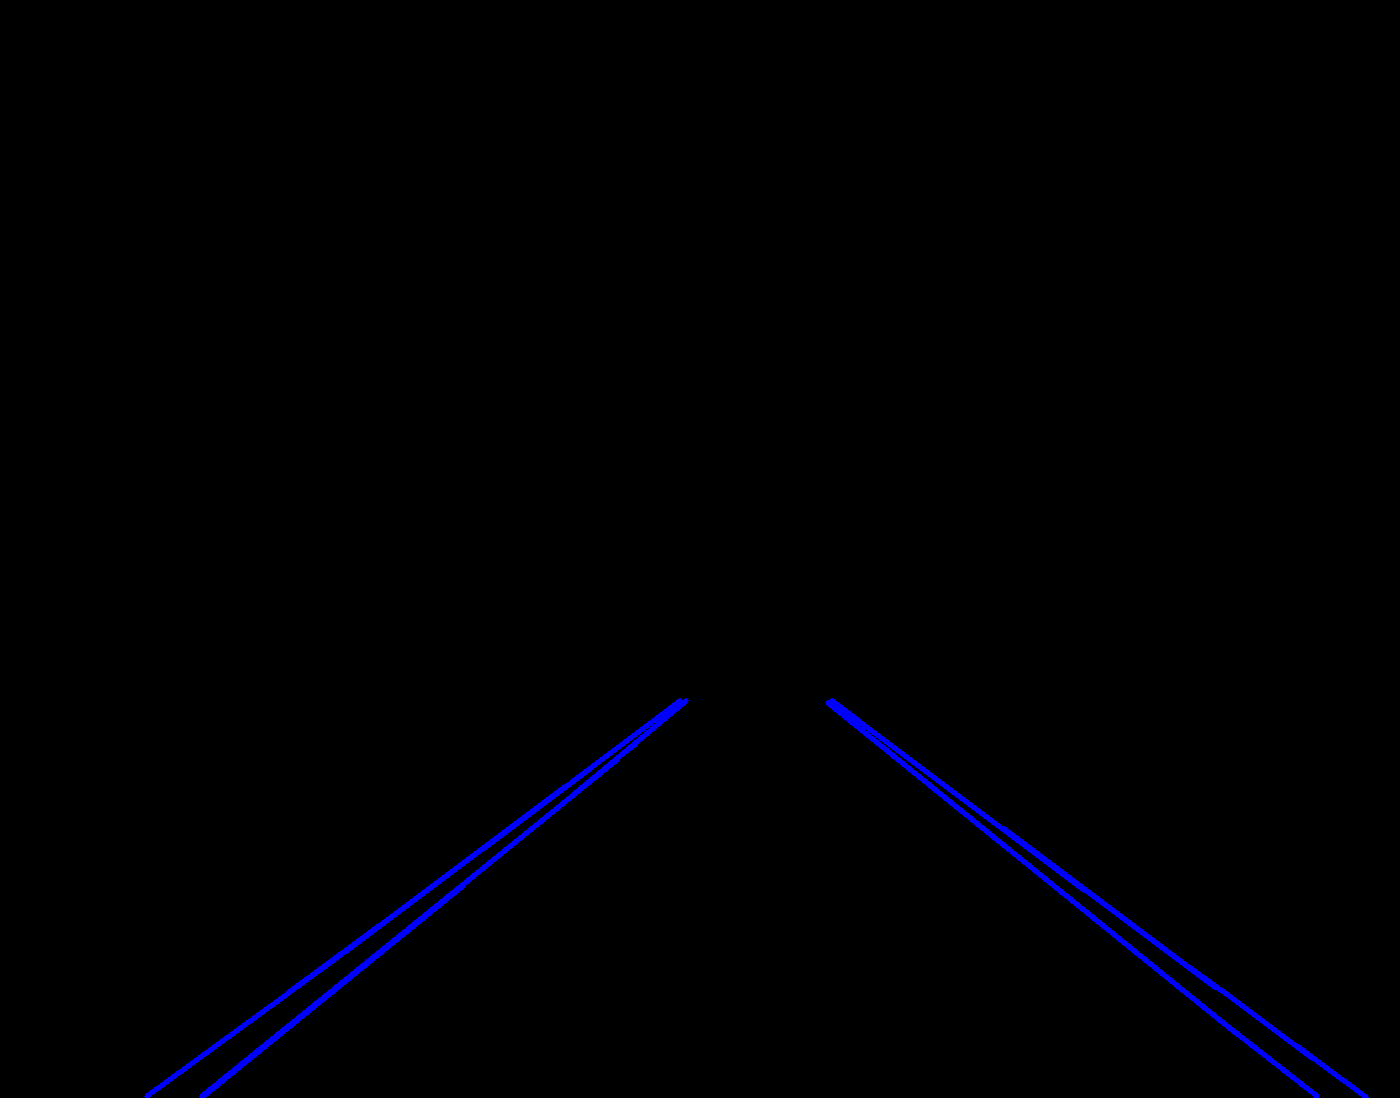

In [12]:
line_img = np.zeros((1098,1400,3), dtype = np.uint8)

road_line = cv2.HoughLinesP(result_img, 3,np.pi/180. , 90, minLineLength=1, maxLineGap=5)

for line in road_line:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1,y1), (x2,y2), (255,0,0), 3)
cv2_imshow(line_img)